<a href="https://colab.research.google.com/github/Nadil-K/DataStorm4.0/blob/main/Copy_of_Copy_of_DataStorm_Semi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Loading the datasets

In [1]:
import numpy as np
import pandas as pd

df1=pd.read_csv('freezer_data.csv')
df2=pd.read_csv('outlets_data.csv')
df3=pd.read_csv('product_data.csv')
df4=pd.read_csv('week_data.csv')
df5=pd.read_csv('sales_data.csv')

## Data Cleaning and Merging

In [2]:
df1

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours
0,ChillMaster,M001,55,2500
1,FreezeZone,M002,75,2800
2,CoolTech,M003,120,3200
3,mini CoolTech,M004,30,1800
4,IceBlast Pro,M005,150,3500
5,IceBlast,M006,65,2700
6,FreezeTech,M007,100,3000
7,FreezeTech 3.0,M008,25,1600
8,ChillTech,M009,80,2800
9,IceTech,M010,200,4500


In [3]:
df11 = df1.drop(columns=['Freezer Name'])
df31 = df3.drop(columns=['product_name'])

In [4]:
df31['product_type'] = df3['pid'].str[0]
df31['product_type'] = df31['product_type'].map({'I':0, 'B':1})
df31

,pid,volume,price,product_type
0,IP1,0.2,100,0
1,IP2,0.2,90,0
2,IP3,0.2,110,0
3,IP4,0.2,100,0
4,IP5,0.2,100,0
5,BP1,1.0,1200,1
6,BP2,1.0,1100,1
7,BP3,1.0,1150,1
8,BP4,1.0,1000,1
9,BP5,1.0,1100,1


### Predicting the duplicated area values

In [5]:
df2

,Outlet_ID,area(sqft)
0,ID7203,5660
1,ID1878,4138
2,ID1740,5546
3,ID4366,5134
4,ID8358,4100
...,...,...
983,ID4119,3858
984,ID2978,3495
985,ID6549,1141
986,ID1210,3322


In [6]:
df21 = df2.sort_values('area(sqft)', ascending=False)
df21.drop_duplicates(subset=['Outlet_ID'], keep='first', inplace=True)
df21

,Outlet_ID,area(sqft)
553,ID1772,9950
500,ID3551,9912
789,ID7758,9910
270,ID5341,9896
663,ID3289,9894
...,...,...
195,ID7472,264
208,ID1494,152
198,ID9777,151
209,ID2283,125


In [7]:
# outlet_counts = df2['Outlet_ID'].value_counts()

# outlet_duplicates = outlet_counts[outlet_counts > 1].index
# outlet_no_duplicates = outlet_counts[outlet_counts == 1].index

# df_duplicates = df2[df2['Outlet_ID'].isin(outlet_duplicates)]
# df_no_duplicates = df2[df2['Outlet_ID'].isin(outlet_no_duplicates)]

In [8]:
# df_duplicates.info()

In [9]:
# df_no_duplicates.head()

In [10]:
# df_unique = pd.DataFrame(df_duplicates['Outlet_ID'].drop_duplicates())
# df_unique['Outlet_ID'] = df_unique['Outlet_ID'].astype(str)
# df_unique.info()

In [11]:
# df_no_duplicates.info()

In [12]:
df5

,Outlet_ID,week,pid,product_name,no_units
0,ID7203,1,IP1,Vanilla Mini Cone,874.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0
...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0


In [13]:
df5=df5.drop("product_name", axis=1)
df5["no_units"]=df5["no_units"].astype(int)
df5 = df5.drop_duplicates()

In [14]:
merged_df_test = pd.merge(df21, df5[['Outlet_ID', 'week', 'pid', 'no_units']], on='Outlet_ID')

general_revenue = pd.merge(merged_df_test, df3[['pid', 'price']], on='pid')
general_revenue['revenue'] = general_revenue['no_units']*general_revenue['price']

total_revenue_per_store = general_revenue.groupby('Outlet_ID')[['revenue','no_units']].sum().reset_index()

total_revenue_per_store

,Outlet_ID,revenue,no_units
0,ID1008,3290990,33002
1,ID1012,3648650,3275
2,ID1024,7726300,6943
3,ID1029,13401160,49142
4,ID1036,6338870,31364
...,...,...,...
946,ID9960,14184310,48368
947,ID9971,3658320,36483
948,ID9973,13501430,48068
949,ID9979,3178310,31892


In [15]:
merged_df_test['product_type'] = merged_df_test['pid'].str[0]
merged_df_test['product_type'] = merged_df_test['product_type'].map({'I':0, 'B':1})

total_revenue_per_type = merged_df_test.groupby(['Outlet_ID', 'product_type'])['no_units'].sum().reset_index()
total_revenue_per_type = total_revenue_per_type.pivot_table(index='Outlet_ID', columns='product_type', values='no_units').fillna(0).reset_index()

total_revenue_per_type

product_type,Outlet_ID,0,1
0,ID1008,33002.0,0.0
1,ID1012,0.0,3275.0
2,ID1024,0.0,6943.0
3,ID1029,40780.0,8362.0
4,ID1036,28203.0,3161.0
...,...,...,...
946,ID9960,39101.0,9267.0
947,ID9971,36483.0,0.0
948,ID9973,39499.0,8569.0
949,ID9979,31892.0,0.0


In [16]:
df_test = pd.merge(total_revenue_per_type, total_revenue_per_store[['Outlet_ID', 'revenue']], on='Outlet_ID')

df_test = df_test.rename(columns={0: 'Impulse',1: 'Bulk'})

df_test

,Outlet_ID,Impulse,Bulk,revenue
0,ID1008,33002.0,0.0,3290990
1,ID1012,0.0,3275.0,3648650
2,ID1024,0.0,6943.0,7726300
3,ID1029,40780.0,8362.0,13401160
4,ID1036,28203.0,3161.0,6338870
...,...,...,...,...
946,ID9960,39101.0,9267.0,14184310
947,ID9971,36483.0,0.0,3658320
948,ID9973,39499.0,8569.0,13501430
949,ID9979,31892.0,0.0,3178310


# Working

In [17]:
df = df21
df

,Outlet_ID,area(sqft)
553,ID1772,9950
500,ID3551,9912
789,ID7758,9910
270,ID5341,9896
663,ID3289,9894
...,...,...
195,ID7472,264
208,ID1494,152
198,ID9777,151
209,ID2283,125


In [413]:
merged_df = pd.merge(df21, df_test[['Outlet_ID', 'revenue']], on='Outlet_ID')
merged_df = pd.merge(merged_df, pivot_df, on='Outlet_ID')

merged_df

,Outlet_ID,area(sqft),revenue,apr_type_0,apr_type_1,feb_type_0,feb_type_1,jan_type_0,jan_type_1,mar_type_0,mar_type_1
0,ID1772,9950,14446520,6457.0,1896.0,11481.0,2730.0,15093.0,2527.0,11225.0,1938.0
1,ID3551,9912,13455030,5350.0,1468.0,9377.0,1932.0,12622.0,2733.0,12163.0,2440.0
2,ID7758,9910,13393550,7224.0,1459.0,9327.0,1332.0,16129.0,3043.0,12854.0,2201.0
3,ID5341,9896,6848500,0.0,1220.0,0.0,1504.0,0.0,2130.0,0.0,1362.0
4,ID3289,9894,13428950,7795.0,1219.0,10299.0,1971.0,15815.0,2895.0,8423.0,2252.0
...,...,...,...,...,...,...,...,...,...,...,...
946,ID7472,264,2298000,4220.0,0.0,5670.0,0.0,7028.0,0.0,6012.0,0.0
947,ID1494,152,2035590,2538.0,0.0,5955.0,0.0,8013.0,0.0,3755.0,0.0
948,ID9777,151,1886390,2871.0,0.0,4816.0,0.0,6706.0,0.0,4524.0,0.0
949,ID2283,125,1672170,2694.0,0.0,3256.0,0.0,5971.0,0.0,4860.0,0.0


# Akesh

In [18]:
## Loading dataset
## Change the path to files
freezer_data = pd.read_csv('/content/freezer_data.csv')
outlet_data = pd.read_csv('/content/outlets_data.csv')
product_data = pd.read_csv('/content/product_data.csv')
sales_data = pd.read_csv('/content/sales_data.csv')
week_data = pd.read_csv('/content/week_data.csv')

# Merge sales data with product data
# ignore volume and product name
temp_df = pd.merge(product_data[['pid','price']], sales_data, on = ['pid'], how = 'right')

# merge outlet data with new data 
x_df = pd.merge(temp_df, outlet_data, on = ['Outlet_ID'], how = 'left')

#product type

x_df['product_type'] = x_df['pid'].str[0]
x_df['product_type'] = x_df['product_type'].map({'I':0, 'B':1})


x_df = x_df.drop('product_name',axis=1)


#bins
bins = [0, 4, 7, 10, 13]
labels = ['jan', 'feb', 'mar', 'apr']

x_df['month'] = pd.cut(x_df['week'], bins, labels=labels)

x_df = x_df.drop('week',axis=1)

x_df


#creating Columns
temp = pd.DataFrame()

temp = x_df[['Outlet_ID', 'no_units', 'month', 'product_type']]

grouped_data = temp.groupby(['Outlet_ID', 'month', 'product_type'])['no_units'].sum().reset_index()
grouped_data['product_type'] = grouped_data['product_type'].astype(str)
grouped_data['sale_per_month_by_type'] = grouped_data['month'].str.cat(grouped_data['product_type'], sep='_type_')
grouped_data


#Polishup
pivot_df = grouped_data.pivot_table(index='Outlet_ID', columns='sale_per_month_by_type', values='no_units')

# Reset column index and convert to DataFrame
pivot_df = pivot_df.reset_index().rename_axis(None, axis=1)
pivot_df

,Outlet_ID,apr_type_0,apr_type_1,feb_type_0,feb_type_1,jan_type_0,jan_type_1,mar_type_0,mar_type_1
0,ID1008,6165.0,0.0,5763.0,0.0,13564.0,0.0,7510.0,0.0
1,ID1012,0.0,472.0,0.0,869.0,0.0,1053.0,0.0,881.0
2,ID1024,0.0,1230.0,0.0,1644.0,0.0,2188.0,0.0,1881.0
3,ID1029,8135.0,1054.0,10266.0,1670.0,13190.0,3227.0,9189.0,2411.0
4,ID1036,3942.0,592.0,5291.0,704.0,10798.0,1080.0,8172.0,785.0
...,...,...,...,...,...,...,...,...,...
946,ID9960,8585.0,1426.0,9058.0,2072.0,12807.0,3252.0,8651.0,2517.0
947,ID9971,5842.0,0.0,9170.0,0.0,11912.0,0.0,9559.0,0.0
948,ID9973,5666.0,1450.0,7516.0,2143.0,11932.0,2819.0,14385.0,2157.0
949,ID9979,5718.0,0.0,5462.0,0.0,10851.0,0.0,9861.0,0.0


# Almost everything is commented


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# test_revenue_per_store['Outlet_ID'] = le.fit_transform(test_revenue_per_store['Outlet_ID'])
# # df_no_duplicates['Outlet_ID'] = le.fit_transform(df_no_duplicates['Outlet_ID'])
# total_revenue_per_store['Outlet_ID'] = le.fit_transform(total_revenue_per_store['Outlet_ID'])

In [ ]:
# sorted_df = df_no_duplicates.sort_values(by='Outlet_ID')
# sorted_df.head()
# df_no_duplicates.sort_values(by='Outlet_ID', inplace=True)

In [ ]:
# y_train = df_no_duplicates['area(sqft)']
# X_train = df_train.drop(columns=['area(sqft)'])

In [ ]:
# X_train.head()

In [ ]:
# from sklearn.linear_model import LinearRegression

# model = LinearRegression()

# df = np.array(y_train)

# model.fit(total_revenue_per_store, df.ravel())

# y_pred = model.predict(test_revenue_per_store)

# df_unique['area(sqft)'] = y_pred
# df_unique['area(sqft)'].describe()
# # df_unique.head()

In [ ]:
# df21 = pd.DataFrame(df2.groupby('Outlet_ID')['area(sqft)'].mean().reset_index())
# df21.info()

In [ ]:
# df2.info()

## New

In [ ]:
# outlet_counts = df2['Outlet_ID'].value_counts()

# outlet_duplicates = outlet_counts[outlet_counts > 1].index
# outlet_no_duplicates = outlet_counts[outlet_counts == 1].index

# df_duplicates = df2[df2['Outlet_ID'].isin(outlet_duplicates)]
# df_no_duplicates = df2[df2['Outlet_ID'].isin(outlet_no_duplicates)]

In [ ]:
# df_unique = pd.DataFrame(df_duplicates['Outlet_ID'].drop_duplicates())
# df_unique['Outlet_ID'] = df_unique['Outlet_ID'].astype(str)
# df_unique.info()

## Resuming Data Cleaning

In [ ]:
df3.head(10)

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100
5,BP1,1.0,Chocolate Fudge Big Scoop,1200
6,BP2,1.0,Moose Tracks Jumbo Cup,1100
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150
8,BP4,1.0,Rocky Road Mega Tub,1000
9,BP5,1.0,Cookies and Cream Mega Tub,1100


In [ ]:
df4.head()

,Week,Start Date,End Date
0,Week 1,1/2/2023,1/8/2023
1,Week 2,1/9/2023,1/15/2023
2,Week 3,1/16/2023,1/22/2023
3,Week 4,1/23/2023,1/29/2023
4,Week 5,1/30/2023,2/5/2023


In [ ]:
df5 = df5.drop_duplicates()
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80990 entries, 0 to 80999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Outlet_ID     80990 non-null  object 
 1   week          80990 non-null  int64  
 2   pid           80990 non-null  object 
 3   product_name  80990 non-null  object 
 4   no_units      80990 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.7+ MB


In [ ]:
result = df5.loc[df5['pid'] == 'BP1']
print(result)

      Outlet_ID  week  pid               product_name  no_units
13459    ID7851     1  BP1  Chocolate Fudge Big Scoop      67.0
13464    ID7851     2  BP1  Chocolate Fudge Big Scoop     150.0
13470    ID7851     4  BP1  Chocolate Fudge Big Scoop      83.0
13477    ID7851     6  BP1  Chocolate Fudge Big Scoop      52.0
13482    ID7851     7  BP1  Chocolate Fudge Big Scoop      79.0
...         ...   ...  ...                        ...       ...
80960    ID8207     8  BP1  Chocolate Fudge Big Scoop      76.0
80968    ID8207     9  BP1  Chocolate Fudge Big Scoop      40.0
80976    ID8207    10  BP1  Chocolate Fudge Big Scoop      49.0
80985    ID8207    11  BP1  Chocolate Fudge Big Scoop      55.0
80995    ID8207    12  BP1  Chocolate Fudge Big Scoop      56.0

[8133 rows x 5 columns]


In [ ]:
merged_df_test = pd.merge(df21, df5[['Outlet_ID', 'week', 'pid', 'no_units']], on='Outlet_ID')
# merged_df_test.head()

pivot_table = merged_df_test.pivot_table(index='Outlet_ID', columns='pid', values='no_units', aggfunc='sum', fill_value=0)
pivot_table.reset_index(inplace=True)

pivot_table.head()

pid,Outlet_ID,BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5
0,ID1008,0,0,0,0,0,6970,7206,6285,6486,6055
1,ID1012,636,713,795,572,559,0,0,0,0,0
2,ID1024,1703,1251,1150,1388,1451,0,0,0,0,0
3,ID1029,1659,2190,1891,1513,1109,9166,7577,9158,7961,6918
4,ID1036,567,583,725,564,722,4934,5708,6200,5526,5835


In [ ]:
num_unique_values = df2['Outlet_ID'].nunique()
print(num_unique_values)

951


In [ ]:
merged_df_test.head()
general_revenue = pd.merge(merged_df_test, df3[['pid', 'price']], on='pid')
general_revenue['revenue'] = general_revenue['no_units']*general_revenue['price']
general_revenue.head()
# general_revenue.info()

,Outlet_ID,area(sqft),week,pid,no_units,price,revenue
0,ID7203,5660,1,IP1,874.0,100,87400.0
1,ID7203,5660,2,IP1,644.0,100,64400.0
2,ID7203,5660,3,IP1,600.0,100,60000.0
3,ID7203,5660,4,IP1,106.0,100,10600.0
4,ID7203,5660,5,IP1,775.0,100,77500.0


In [ ]:
total_revenue_per_store = general_revenue.groupby('Outlet_ID')['revenue'].sum().reset_index()
total_revenue_per_store.head()

,Outlet_ID,revenue
0,ID1008,3290990.0
1,ID1012,3648650.0
2,ID1024,7726300.0
3,ID1029,13401160.0
4,ID1036,6338870.0


In [ ]:
total_revenue_per_week = general_revenue.groupby(['Outlet_ID', 'week'])['revenue'].sum().reset_index()
total_revenue_per_week.head()

,Outlet_ID,week,revenue
0,ID1008,1,397290.0
1,ID1008,2,332330.0
2,ID1008,3,362450.0
3,ID1008,4,273290.0
4,ID1008,5,155790.0


In [ ]:
total_revenue_per_product = general_revenue.groupby(['Outlet_ID', 'pid'])['revenue'].sum().reset_index()
total_revenue_per_product.head()

,Outlet_ID,pid,revenue
0,ID1008,IP1,697000.0
1,ID1008,IP2,648540.0
2,ID1008,IP3,691350.0
3,ID1008,IP4,648600.0
4,ID1008,IP5,605500.0


# Tharusha Clustering

In [414]:
merged_df

,Outlet_ID,area(sqft),revenue,apr_type_0,apr_type_1,feb_type_0,feb_type_1,jan_type_0,jan_type_1,mar_type_0,mar_type_1
0,ID1772,9950,14446520,6457.0,1896.0,11481.0,2730.0,15093.0,2527.0,11225.0,1938.0
1,ID3551,9912,13455030,5350.0,1468.0,9377.0,1932.0,12622.0,2733.0,12163.0,2440.0
2,ID7758,9910,13393550,7224.0,1459.0,9327.0,1332.0,16129.0,3043.0,12854.0,2201.0
3,ID5341,9896,6848500,0.0,1220.0,0.0,1504.0,0.0,2130.0,0.0,1362.0
4,ID3289,9894,13428950,7795.0,1219.0,10299.0,1971.0,15815.0,2895.0,8423.0,2252.0
...,...,...,...,...,...,...,...,...,...,...,...
946,ID7472,264,2298000,4220.0,0.0,5670.0,0.0,7028.0,0.0,6012.0,0.0
947,ID1494,152,2035590,2538.0,0.0,5955.0,0.0,8013.0,0.0,3755.0,0.0
948,ID9777,151,1886390,2871.0,0.0,4816.0,0.0,6706.0,0.0,4524.0,0.0
949,ID2283,125,1672170,2694.0,0.0,3256.0,0.0,5971.0,0.0,4860.0,0.0


In [415]:
merged_df['jan_vol'] = merged_df['jan_type_0']*0.2 + merged_df['jan_type_1']
merged_df['feb_vol'] = merged_df['feb_type_0']*0.2 + merged_df['feb_type_1']
merged_df['mar_vol'] = merged_df['mar_type_0']*0.2 + merged_df['mar_type_1']
merged_df['apr_vol'] = merged_df['apr_type_0']*0.2 + merged_df['apr_type_1']

New = merged_df.drop(columns=['jan_type_0', 'jan_type_1', 'feb_type_0', 'feb_type_1', 'mar_type_0', 'mar_type_1', 'apr_type_0', 'apr_type_1'])

In [416]:
New

,Outlet_ID,area(sqft),revenue,jan_vol,feb_vol,mar_vol,apr_vol
0,ID1772,9950,14446520,5545.6,5026.2,4183.0,3187.4
1,ID3551,9912,13455030,5257.4,3807.4,4872.6,2538.0
2,ID7758,9910,13393550,6268.8,3197.4,4771.8,2903.8
3,ID5341,9896,6848500,2130.0,1504.0,1362.0,1220.0
4,ID3289,9894,13428950,6058.0,4030.8,3936.6,2778.0
...,...,...,...,...,...,...,...
946,ID7472,264,2298000,1405.6,1134.0,1202.4,844.0
947,ID1494,152,2035590,1602.6,1191.0,751.0,507.6
948,ID9777,151,1886390,1341.2,963.2,904.8,574.2
949,ID2283,125,1672170,1194.2,651.2,972.0,538.8


In [417]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
New['Outlet_ID'] = le.fit_transform(New['Outlet_ID'])
column_names = New.drop(columns=['Outlet_ID', 'area(sqft)']).columns

In [418]:
New

,Outlet_ID,area(sqft),revenue,jan_vol,feb_vol,mar_vol,apr_vol
0,83,9950,14446520,5545.6,5026.2,4183.0,3187.4
1,251,9912,13455030,5257.4,3807.4,4872.6,2538.0
2,729,9910,13393550,6268.8,3197.4,4771.8,2903.8
3,447,9896,6848500,2130.0,1504.0,1362.0,1220.0
4,231,9894,13428950,6058.0,4030.8,3936.6,2778.0
...,...,...,...,...,...,...,...
946,701,264,2298000,1405.6,1134.0,1202.4,844.0
947,52,152,2035590,1602.6,1191.0,751.0,507.6
948,928,151,1886390,1341.2,963.2,904.8,574.2
949,139,125,1672170,1194.2,651.2,972.0,538.8


In [419]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [420]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(New.drop(columns=['Outlet_ID', 'area(sqft)'])), columns=column_names)

In [421]:
scaled_data

,revenue,jan_vol,feb_vol,mar_vol,apr_vol
0,1.276813,0.658278,1.077460,0.679451,0.917255
1,1.079476,0.556876,0.506271,1.005349,0.474013
2,1.067239,0.912732,0.220396,0.957712,0.723687
3,-0.235433,-0.543486,-0.573214,-0.653725,-0.425576
4,1.074285,0.838563,0.610967,0.563005,0.637823
...,...,...,...,...,...
946,-1.141126,-0.798363,-0.746614,-0.729150,-0.682211
947,-1.193354,-0.729049,-0.719901,-0.942477,-0.911818
948,-1.223050,-0.821022,-0.826660,-0.869793,-0.866361
949,-1.265686,-0.872743,-0.972878,-0.838035,-0.890523


In [422]:
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(scaled_data)

cluster_assignments = kmeans.labels_

scaled_data['Cluster'] = cluster_assignments

silhouette_coefficient = silhouette_score(scaled_data, cluster_assignments)

print("Silhouette Coefficient:", silhouette_coefficient)

inertia = kmeans.inertia_
print("Inertia: ", inertia)

Silhouette Coefficient: 0.8462836603946927
Inertia:  148.13641738582444


In [423]:
New['Cluster'] = scaled_data['Cluster']
New

,Outlet_ID,area(sqft),revenue,jan_vol,feb_vol,mar_vol,apr_vol,Cluster
0,83,9950,14446520,5545.6,5026.2,4183.0,3187.4,6
1,251,9912,13455030,5257.4,3807.4,4872.6,2538.0,1
2,729,9910,13393550,6268.8,3197.4,4771.8,2903.8,1
3,447,9896,6848500,2130.0,1504.0,1362.0,1220.0,0
4,231,9894,13428950,6058.0,4030.8,3936.6,2778.0,1
...,...,...,...,...,...,...,...,...
946,701,264,2298000,1405.6,1134.0,1202.4,844.0,3
947,52,152,2035590,1602.6,1191.0,751.0,507.6,3
948,928,151,1886390,1341.2,963.2,904.8,574.2,3
949,139,125,1672170,1194.2,651.2,972.0,538.8,3


In [424]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.scatter(scaled_data['Outlet_ID'], scaled_data['revenue'], c=scaled_data['Cluster'], cmap='viridis')
# plt.xlabel('Outlet_ID')
# plt.ylabel('revenue')
# plt.title('K-means Clustering Visualization')
# plt.show()

In [425]:
New['volume'] = New['jan_vol'] + New['feb_vol'] + New['mar_vol'] + New['apr_vol']
final = New.drop(columns=['jan_vol','feb_vol','mar_vol','apr_vol'])
final

,Outlet_ID,area(sqft),revenue,Cluster,volume
0,83,9950,14446520,6,17942.2
1,251,9912,13455030,1,16475.4
2,729,9910,13393550,1,17141.8
3,447,9896,6848500,0,6216.0
4,231,9894,13428950,1,16803.4
...,...,...,...,...,...
946,701,264,2298000,3,4586.0
947,52,152,2035590,3,4052.2
948,928,151,1886390,3,3783.4
949,139,125,1672170,3,3356.2


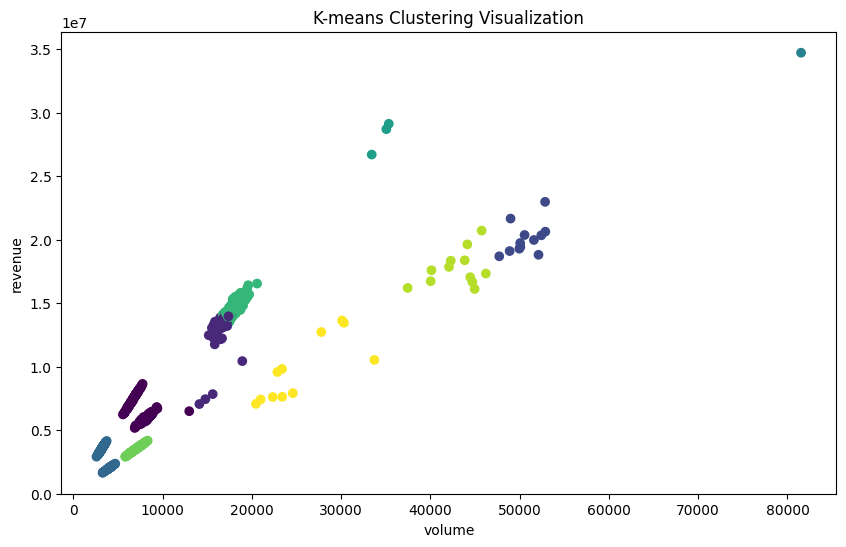

In [426]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(final['volume'], final['revenue'], c=final['Cluster'], cmap='viridis')
plt.xlabel('volume')
plt.ylabel('revenue')
plt.title('K-means Clustering Visualization')
plt.show()

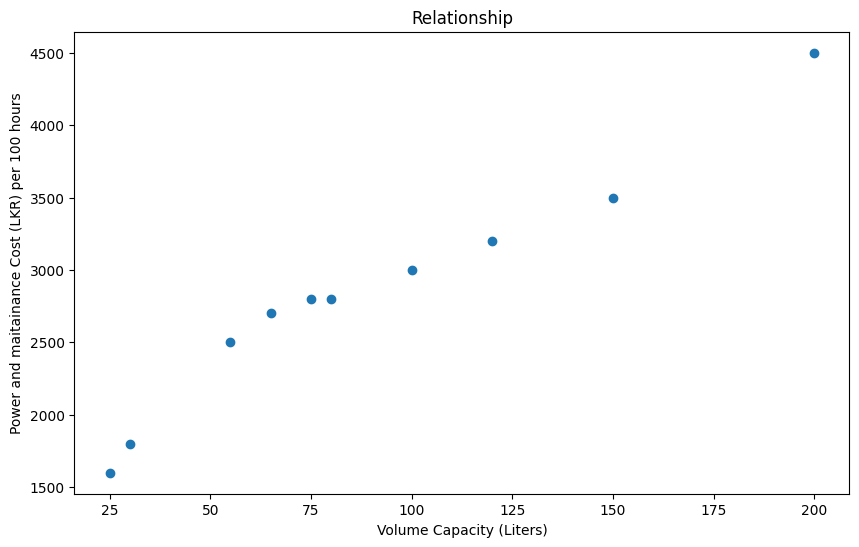

In [443]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['Volume Capacity (Liters)'], df1['Power and maitainance Cost (LKR) per 100 hours'])
plt.xlabel('Volume Capacity (Liters)')
plt.ylabel('Power and maitainance Cost (LKR) per 100 hours')
plt.title('Relationship')
plt.show()

In [445]:
means = final.groupby('Cluster')[['volume', 'revenue']].mean()
means

,volume,revenue
Cluster,,
0,7583.975896,6.609626e+06
1,16565.217544,1.322011e+07
2,50672.733333,2.008531e+07
3,3547.786982,2.918440e+06
4,81520.000000,3.473213e+07
5,34611.200000,2.818244e+07
6,18127.074534,1.468385e+07
7,7005.295652,3.503442e+06
8,43004.000000,1.771665e+07


In [428]:
count = final.groupby('Cluster')[['volume', 'revenue']].size().reset_index()
count

,Cluster,0
0,0,307
1,1,114
2,2,12
3,3,169
4,4,1
5,5,3
6,6,161
7,7,161
8,8,12
9,9,11


In [429]:
# means['volume'] = means['volume']/count[0]
# means['revenue'] = means['revenue']/count[0]
# means

In [430]:
df1['Total_cost'] = (df1['Power and maitainance Cost (LKR) per 100 hours']/100)*24*30*4
df1

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours,Total_cost
0,ChillMaster,M001,55,2500,72000.0
1,FreezeZone,M002,75,2800,80640.0
2,CoolTech,M003,120,3200,92160.0
3,mini CoolTech,M004,30,1800,51840.0
4,IceBlast Pro,M005,150,3500,100800.0
5,IceBlast,M006,65,2700,77760.0
6,FreezeTech,M007,100,3000,86400.0
7,FreezeTech 3.0,M008,25,1600,46080.0
8,ChillTech,M009,80,2800,80640.0
9,IceTech,M010,200,4500,129600.0


In [433]:
for i in means['revenue']/12:
  arr=[]
  for j in df1['Total_cost']:
    ROI=i/j
    arr.append(ROI)
  maxi = max(arr)
  print(i,maxi, arr.index(maxi))

550802.1851248642 11.95317242024445 7
1101675.4678362573 23.90788775686322 7
1673775.5555555557 36.323254243827165 7
243203.3431952663 5.277850329758383 7
2894344.1666666665 62.81128833912037 7
2348536.6666666665 50.966507523148145 7
1223654.0890269151 26.554993251452153 7
291953.4886128364 6.335796193854956 7
1476387.1527777778 32.03965175298997 7
813128.1060606061 17.646009246106903 7


In [441]:
for i in (means['volume']/12):
  temp=[]
  for j in df1['Volume Capacity (Liters)']:
    ISR=(i/j)-1
    if ISR<=0:
      temp.append(ISR)
  if len(temp):
    mini = max(temp)
    print(temp.index(mini), mini, i)